## MODIS Vegetation Index Parser

In [3]:
import tables
import h5py
import numpy as np
import sys
from pyhdf.SD import SD, SDC
import pandas as pd
import time
import calendar
import matplotlib.pyplot as plt

import datetime
import os

## Initial Exploration

In [4]:
test = SD("modis_vegetation_index/2010/MOD13C1.A2010097.006.2016188212432.hdf")

In [5]:
test.select("CMG 0.05 Deg 16 days EVI")[960:1080, 1110:1230]

array([[-3000, -3000, -3000, ...,  1092,   919,  1034],
       [-3000, -3000, -3000, ...,  1037,   933,  1168],
       [-3000, -3000, -3000, ...,  1046,  1118,  1394],
       ...,
       [-3000, -3000, -3000, ...,  2817,  2146,  1865],
       [-3000, -3000, -3000, ...,  2896,  1674,  2212],
       [-3000, -3000, -3000, ...,  2470,  2156,  2563]], dtype=int16)

In [6]:
np.repeat(test.select("CMG 0.05 Deg 16 days EVI")[960:1080, 1110:1230], 16, axis=1).shape

(120, 1920)

## File Parsing

In [51]:
final_arr = []

In [84]:
year = 2019
init = []
files_list = os.listdir(f"modis_vegetation_index/{year}")
counter = 0

for file in files_list:
    try:
        file_parse = SD(f"modis_vegetation_index/{year}/{file}")
    except:
        print(f"{file} unable to be opened.")
        continue
    print(file)
    temp = SD(f"modis_vegetation_index/{year}/{file}")
    if counter == 22:
        for i in range(13):
            init.append(temp.select("CMG 0.05 Deg 16 days EVI")[960:1080, 1110:1230])
    else:
        for i in range(16):
            init.append(temp.select("CMG 0.05 Deg 16 days EVI")[960:1080, 1110:1230])
    counter+=1
    print(counter)

MOD13C1.A2019001.006.2019024203354.hdf
1
MOD13C1.A2019017.006.2019037213226.hdf
2
MOD13C1.A2019033.006.2019072172524.hdf
3
MOD13C1.A2019049.006.2019073193743.hdf
4
MOD13C1.A2019065.006.2019084034110.hdf
5
MOD13C1.A2019081.006.2019098163258.hdf
6
MOD13C1.A2019097.006.2019114051812.hdf
7
MOD13C1.A2019113.006.2019130050040.hdf
8
MOD13C1.A2019129.006.2019150141624.hdf
9
MOD13C1.A2019145.006.2019162054702.hdf
10
MOD13C1.A2019161.006.2019178051239.hdf
11
MOD13C1.A2019177.006.2019194051649.hdf
12
MOD13C1.A2019193.006.2019210054933.hdf
13
MOD13C1.A2019209.006.2019226065523.hdf
14
MOD13C1.A2019225.006.2019248181129.hdf
15
MOD13C1.A2019241.006.2019262213957.hdf
16
MOD13C1.A2019257.006.2019275220306.hdf
17
MOD13C1.A2019273.006.2019290044629.hdf
18
MOD13C1.A2019289.006.2019306054311.hdf
19
MOD13C1.A2019305.006.2019324014429.hdf
20
MOD13C1.A2019321.006.2019338054104.hdf
21
MOD13C1.A2019337.006.2019354191230.hdf
22
MOD13C1.A2019353.006.2020005033948.hdf
23
checksums_501514880 unable to be opened.


In [85]:
len(init)

365

In [86]:
final_arr.append(np.array(init).reshape((365, 120*120)))

In [96]:
final_arr_stacked = np.vstack((final_arr))

In [111]:
sum(sum(final_arr_stacked  < 0))

10828677

## File Export

In [97]:
pd.DataFrame(final_arr_stacked).to_hdf("final_vegetation.h5", key="vegetation")

In [102]:
np.array(final_arr[0][0]).shape

(14400,)

## Mapping Exploration

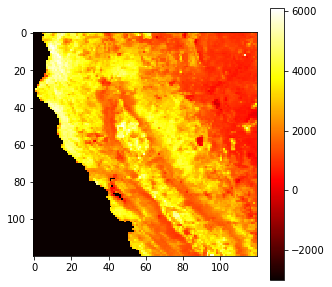

In [113]:
fig, ax = plt.subplots(figsize = (5,5))
test_map = ax.imshow(final_arr[8][215].reshape(120, 120), cmap="hot", interpolation="none")
cbar = fig.colorbar(test_map, ax=ax)